# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


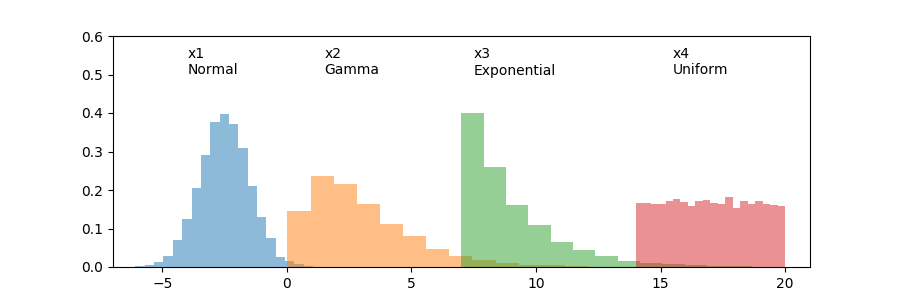

In [6]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


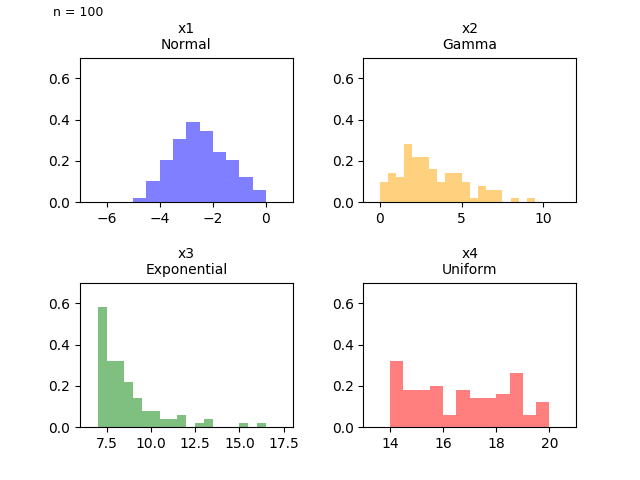

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.animation as animation

n = 100

%matplotlib notebook

# create the 4 subplots
fig = plt.figure()
gspec = gridspec.GridSpec(4,4)
top_left = plt.subplot(gspec[0:2, 0:2])
top_right = plt.subplot(gspec[0:2, 2:])
bottom_left = plt.subplot(gspec[2:, 0:2])
bottom_right = plt.subplot(gspec[2:, 2:])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=2.5)

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)

x = [x1, x2, x3, x4]
subplots = [top_left, top_right, bottom_left, bottom_right]
axisValues = [[-7,1,0,0.7], [-1,12,0,0.7], [6,18,0,0.7], [13,21,0,0.7]]
titles = ['x1\nNormal', 'x2\nGamma', 'x3\nExponential', 'x4\nUniform']
colors = ['blue', 'orange', 'green', 'red']

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    for i in range(len(subplots)):
        subplots[i].cla()
        subplots[i].hist(x[i][:curr], normed=True, bins=20, alpha=0.5, color=colors[i], lw=0)
        subplots[i].axis(axisValues[i])
        subplots[i].set_title(titles[i], fontsize=10)
    top_left.annotate('n = {}'.format(curr), [-8,0.9], fontsize=9, annotation_clip=False)    
    
a = animation.FuncAnimation(fig, update, interval=100)
